# MLE for Poisson Distribution

In this notebook you will perform [maximum likelihood estimation](https://en.wikipedia.org/wiki/Maximum_likelihood), or MLE, for the parameter $\lambda$ in the [Poisson](https://en.wikipedia.org/wiki/Poisson_distribution) distribution and bootstrap the results.

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from scipy.optimize import minimize
from scipy.stats import poisson

## Create a dataset

Generate a dataset from the Poisson distribution with a known parameter $\lambda$:

In [3]:
np.random.seed(0)
λ = 3.0
data = np.random.poisson(λ, size=20)

## MLE with `scipy.optimize.minimize`

Use SciPy, write a function that performs MLE for the $\lambda$ parameter of the Poisson distribution. In your function you should:

* Use `scipy.stats.poisson` to calculate the negative log-likelihood of the Poisson distribution.
* Use `scipy.optimize.minimize` to minimize the negative log-likelihood.

In [4]:
def fit_lambda(data):
    """Perform MLE to estimate the λ parameter of the Poisson distribution.
    
    Parameters
    ----------
    data: ndarray
        The data to use in estimating lambda
    
    Returns
    -------
    lambda: float
        The MLE value for lambda
    """
    fit = minimize(lambda x: -(np.sum(poisson.logpmf(data, x))), [3.0])
    return fit["x"][0]
    

In [5]:
assert abs(fit_lambda(3*np.ones(10))-3.0) < 1e-3
assert abs(fit_lambda(100*np.ones(100))-100.0) < 1e-3
assert abs(fit_lambda(data)-data.mean()) < 1e-3

Here is the estimated value of $\lambda$:

In [6]:
fit_lambda(data)

2.9000002368452722

## Bootstrap

We see that the MLE for $\hat{\lambda}$ is close to the original value of $\lambda=3.0$. Bootstrap resample this estimator 200 times (using your faster version) to find the distribution of $\hat{\lambda}$. Save the distributions of $\lambda$ values in an list or array named `estimates`:

In [7]:
estimates = []
for i in range(200):
    simulation = np.random.choice(np.random.poisson(fit_lambda(data), size=20), 20)
    estimates.append(np.mean(simulation))

Plot the distibution of bootstrapped estimates using Matplotlib. Lable your axes, use a grid and customize the bins:

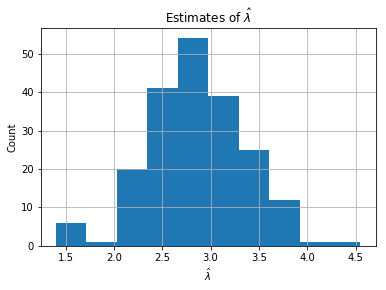

In [8]:
plt.hist(estimates, bins = 10)
plt.xlabel("$\^{\lambda}$")
plt.ylabel("Count")
plt.title("Estimates of $\^{\lambda}$")
ax = plt.gca()
ax.grid()

Compute the print the 95% confidence interval:

In [9]:
print("95% confidence interval: ", np.percentile(estimates, [2.5,97.5]))

95% confidence interval:  [ 1.64875  3.8    ]
